## Sales analysis

## Import libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Cheak Data

In [2]:
frame=pd.read_csv("./Sales_Data/Sales_April_2019.csv")
frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Merge all the data into a single table

In [3]:
file = [x for x in os.listdir("./Sales_Data/")]
all_month_data = pd.DataFrame()
for x in file:
    month = pd.read_csv("./Sales_Data/"+x)
    all_month_data = pd.concat([all_month_data,month])    

## Check if it merged properly

In [4]:
all_month_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Make it into a single File

In [5]:
all_month_data.to_csv("all_data.csv",index=False)

## Check the new file

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Clean the data

#### Remove null values

In [8]:
nan_val = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how="all")
nan_val

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Assign the right datatype to column

#### Find "Quantity Order" and delete it

In [11]:
Quantity_val = all_data.loc[all_data["Quantity Ordered"] == "Quantity Ordered",:]
all_data = all_data.loc[all_data["Quantity Ordered"] != "Quantity Ordered",:]
Quantity_val

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], format='%m/%d/%y %H:%M')

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


### Add aditional column 

#### Add Hour And Minutes Columns

In [14]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

#### Add month column

In [15]:
all_data["Month"] = all_data["Order Date"].dt.month

#### Add Sales Column

In [16]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]

#### Add city column

In [17]:
city= all_data["Purchase Address"].str.split(pat=",").str[1:2].str.join("")
state=all_data["Purchase Address"].str.split(pat=",").str[2:].str.join("").str.split().str[0].str.join("")
all_data["City"]=city+" "+"("+state+")"

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Minute,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,46,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,30,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,38,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,38,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,27,4,11.99,Los Angeles (CA)


In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Hour              185950 non-null  int32         
 7   Minute            185950 non-null  int32         
 8   Month             185950 non-null  int32         
 9   Sales             185950 non-null  float64       
 10  City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(4)
memory usage: 14.9+ MB


### Question 1: What was the best month for sales? How much was earned that month?

In [20]:
sales_by_month=all_data.groupby("Month")["Sales"].sum()
sales_by_month

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

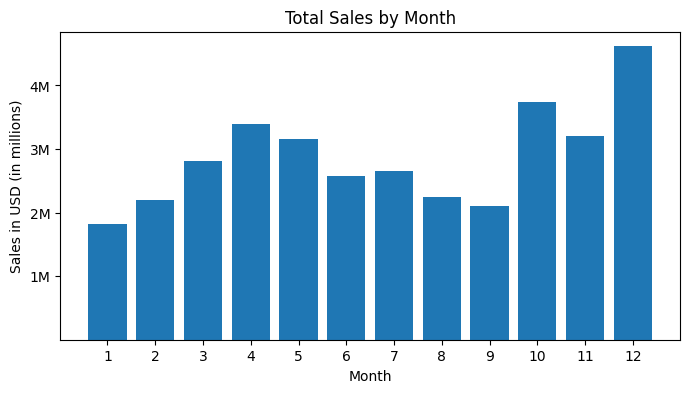

In [21]:
plt.figure(figsize=(8, 4))
plt.bar(sales_by_month.index,sales_by_month)
plt.xticks(sales_by_month.index)
plt.yticks([1e6, 2e6, 3e6, 4e6], ["1M", "2M", "3M", "4M"])
plt.xlabel("Month")
plt.ylabel("Sales in USD (in millions)")
plt.title("Total Sales by Month")
plt.show()

#### Question 2: What city sold the most product?

In [22]:
sales_by_city=all_data.groupby("City")["Sales"].sum()
sales_by_city

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

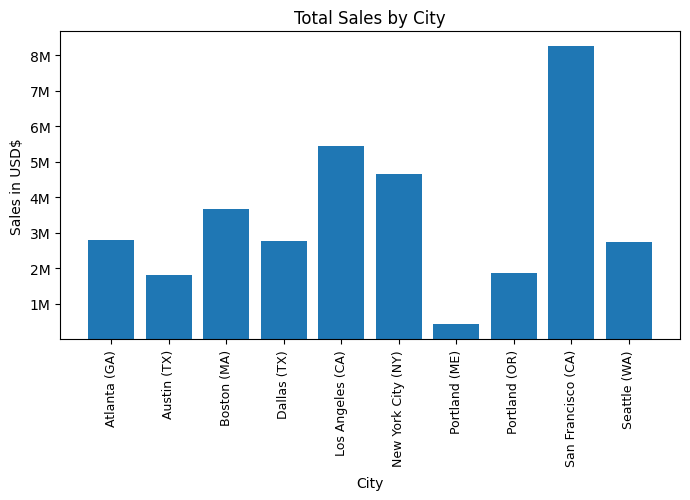

In [23]:
plt.figure(figsize=(8, 4))
plt.bar(sales_by_city.index,sales_by_city)
plt.xticks(sales_by_city.index,rotation="vertical",size=9)
plt.yticks([1e6, 2e6, 3e6, 4e6 ,5e6 ,6e6, 7e6, 8e6], [ str(x) +"M" for x in range(1,9)])
plt.xlabel("City")
plt.ylabel("Sales in USD$")
plt.title("Total Sales by City")
plt.show()

#### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product

In [24]:
sales_by_hour=all_data.groupby("Hour").count()
sales_by_hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Minute,Month,Sales,City
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


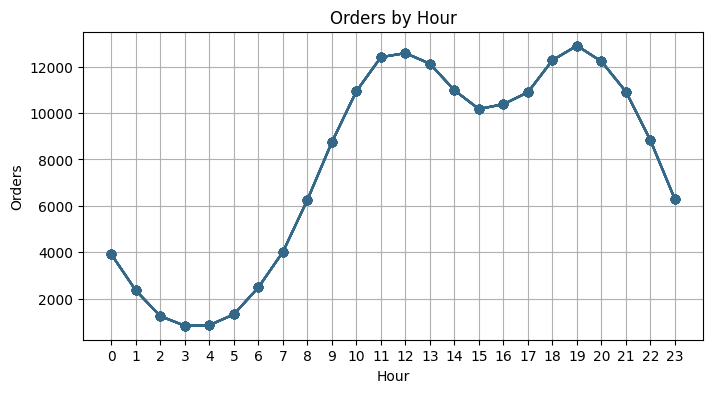

In [47]:
plt.figure(figsize=(8,4))
plt.plot(sales_by_hour.index,sales_by_hour,color="#346888",marker="o")
plt.xticks(sales_by_hour.index)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Orders")
plt.title("Orders by Hour")
plt.show()

### in conclusion
##### I recommend scheduling advertisements before 11 and 18

#### Question 4: What products are most often sold together?

In [42]:
df = all_data.loc[all_data.duplicated(subset="Order ID", keep=False)==True]

df.loc[:,"Grouped"]= df.groupby('Order ID')['Product'].transform(', '.join)

df = df[["Order ID","Grouped"]].drop_duplicates()

df.head()

C:\Users\srudd\AppData\Local\Temp\ipykernel_2216\1951762245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"Grouped"]= df.groupby('Order ID')['Product'].transform(', '.join)


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [43]:
count_dict = {}
for row in df['Grouped']:
    row_list = row.split(',')
    for combo in zip(row_list, row_list[1:]):
        count_dict[combo] = count_dict.get(combo, 0) + 1

In [44]:
df = pd.DataFrame.from_dict(count_dict, orient='index', columns=['Count'])
df = df.sort_values(by='Count', ascending=False,inplace=True)
df_sorted.head(10)

,Count
"(iPhone, Lightning Charging Cable)",1001
"(Google Phone, USB-C Charging Cable)",984
"(iPhone, Wired Headphones)",362
"(Vareebadd Phone, USB-C Charging Cable)",361
"(iPhone, Apple Airpods Headphones)",313
"(Google Phone, Wired Headphones)",306
"(Google Phone, Bose SoundSport Headphones)",185
"( USB-C Charging Cable, Wired Headphones)",114
"(Vareebadd Phone, Wired Headphones)",107
"(Vareebadd Phone, Bose SoundSport Headphones)",64


#### Question 5: What product sold the most? Why do you think it sold the most?

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Minute,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",8,46,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",22,30,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,38,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",14,38,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",9,27,4,11.99,Los Angeles (CA)


In [28]:
Quantity_by_Product=all_data.groupby("Product")["Quantity Ordered"].sum()
price_by_Product=all_data.groupby("Product")["Price Each"].mean()

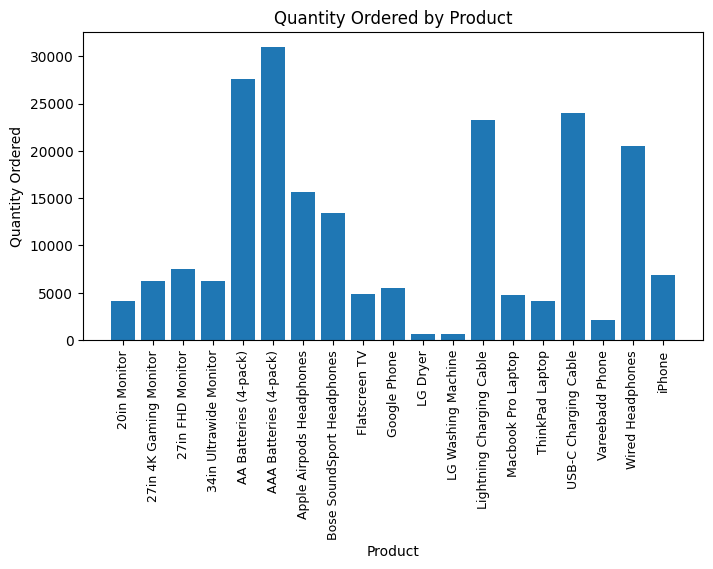

In [29]:
plt.figure(figsize=(8, 4))
plt.bar(Quantity_by_Product.index,Quantity_by_Product)
plt.xticks(Quantity_by_Product.index,rotation="vertical",size=9)
plt.xlabel("Product",)
plt.ylabel("Quantity Ordered")
plt.title("Quantity Ordered by Product")
plt.show()

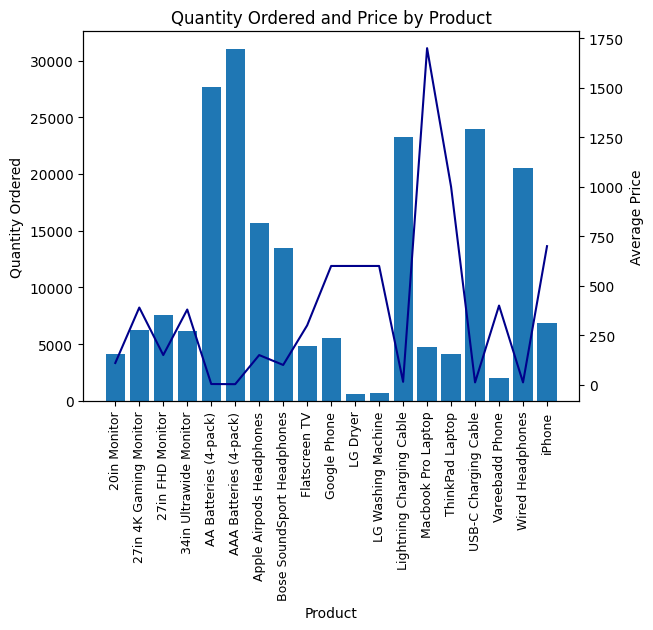

In [31]:
fig,ax1=plt.subplots()
plt.bar(Quantity_by_Product.index,Quantity_by_Product)
plt.xticks(Quantity_by_Product.index,rotation="vertical",size=9)
plt.xlabel("Product",)
plt.ylabel("Quantity Ordered")
plt.title("Quantity Ordered and Price by Product")
ax2=ax1.twinx()
ax2.plot(price_by_Product.index,price_by_Product,color="darkblue")
ax2.set_ylabel("Average Price")
plt.show()